<a href="https://colab.research.google.com/github/StanleyLiangYork/TensorFlow_For_Image/blob/master/Cat_Dog_imageFile_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!gsutil cp gs://pet-detect-239118/dogs-vs-cats.zip ./dogs-vs-cats.zip

Copying gs://pet-detect-239118/dogs-vs-cats.zip...
\ [1 files][812.1 MiB/812.1 MiB]   78.3 MiB/s                                   
Operation completed over 1 objects/812.1 MiB.                                    


In [0]:
import os
import zipfile

zf = zipfile.ZipFile("train-jpg.zip", "w")
for dirname, subdirs, files in os.walk("./train-jpg"):
    zf.write(dirname)
    for filename in files:
        zf.write(os.path.join(dirname, filename))
zf.close()


In [0]:
with ZipFile('./train.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
import pathlib
data_dir = './train'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*.jpg')))
print('total amount of images in the training set: ', image_count)

total amount of images in the training set:  25000


In [0]:
with ZipFile('./test1.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
data_dir = './test1'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*.jpg')))
print('total amount of images in the test set: ', image_count)

total amount of images in the test set:  12500


Plot Dog and Cat Photos

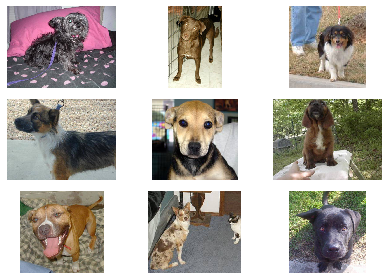

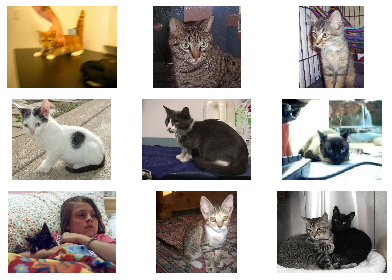

In [0]:
from matplotlib import pyplot as plt
from matplotlib.image import imread

folder = './train/'
for i in range(9):
  plt.subplot(3,3,i+1)
  filename = folder + 'dog.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
  plt.axis('off')

plt.tight_layout()
plt.show()

for i in range(9):
  plt.subplot(3,3,i+1)
  filename = folder + 'cat.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
  plt.axis('off')

plt.tight_layout()
plt.show()

Load image files to a Numpy array

In [0]:
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

folder = './train/'
photos = []
labels = []

for file in listdir(folder):
  output = 0.0
  if file.startswith('cat'):
    output = 1.0
    photo = load_img(folder+file, target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)


Set the file directors and copy images files for Image Data Iterators


In [0]:
from os import mkdir
from os import makedirs
from os import path
from os import listdir
from shutil import copyfile
from random import seed
from random import random

if not (path.exists('./dogs_vs_cats')): 
  mkdir('./dogs_vs_cats')

dataset_home = "./dogs_vs_cats/"
subdirs = ['train/', 'test/']

for subdir in subdirs:
  labeldirs = ['dogs/', 'cats/']
  for labeldir in labeldirs:
     newdir = dataset_home + subdir + labeldir
     makedirs(newdir)


In [0]:
seed(100)

val_ratio = 0.25

src_dir = "./train/"
for file in listdir(src_dir):
  src = src_dir+file
  dst_dir = 'train/'
  if random() < val_ratio:
    dst_dir = 'test/'
  if file.startswith('cat'):
    dst = dataset_home+dst_dir+'cats/'+file
    copyfile(src, dst)
  elif file.startswith('dog'):
    dst = dataset_home+dst_dir+'dogs/'+file
    copyfile(src, dst)


In [0]:
import pathlib

data_dir = './dogs_vs_cats'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('train/cats/*.jpg')))
print('total amount of cat images in the training set: ', image_count)
image_count = len(list(data_dir.glob('train/dogs/*.jpg')))
print('total amount of dog images in the training set: ', image_count)

total amount of cat images in the training set:  9416
total amount of dog images in the training set:  9418


Build the image processing pipeline

In [0]:
import pathlib
import tensorflow as tf
import numpy as np

def build_file_list(train_dir, test_dir, image_type='jpg'):
  train_dir = pathlib.Path(train_dir)
  test_dir = pathlib.Path(test_dir)
  path_str = '*/*.'+image_type
  image_count_train = len(list(train_dir.glob(path_str)))
  print('total amount of images in the training dataset: ', image_count_train)
  image_count_test = len(list(test_dir.glob(path_str)))
  print('total amount of images in the test dataset: ', image_count_test)
  CLASS_NAMES = np.array([item.name for item in train_dir.glob('*') if item.name != "LICENSE.txt"])
  print("Labels: ", CLASS_NAMES)
  train_list_ds = tf.data.Dataset.list_files(str(train_dir/'*/*'))
  test_list_ds = tf.data.Dataset.list_files(str(test_dir/'*/*'))
  return train_list_ds, test_list_ds, image_count_train, image_count_test, CLASS_NAMES


In [0]:
train_list_ds, test_list_ds, image_count_train, image_count_test, CLASS_NAMES = build_file_list('./dogs_vs_cats/train', './dogs_vs_cats/test')

for f in train_list_ds.take(5):
  print(f.numpy())

for f in test_list_ds.take(5):
  print(f.numpy())

print((CLASS_NAMES))
print(image_count_train, image_count_test)


total amount of images in the training dataset:  18834
total amount of images in the test dataset:  6166
Labels:  ['cats' 'dogs']
b'dogs_vs_cats/train/cats/cat.1322.jpg'
b'dogs_vs_cats/train/dogs/dog.10070.jpg'
b'dogs_vs_cats/train/dogs/dog.8284.jpg'
b'dogs_vs_cats/train/cats/cat.11177.jpg'
b'dogs_vs_cats/train/dogs/dog.8210.jpg'
b'dogs_vs_cats/test/dogs/dog.10858.jpg'
b'dogs_vs_cats/test/dogs/dog.4900.jpg'
b'dogs_vs_cats/test/dogs/dog.8749.jpg'
b'dogs_vs_cats/test/cats/cat.8800.jpg'
b'dogs_vs_cats/test/dogs/dog.4185.jpg'
['cats' 'dogs']
18834 6166


In [0]:
import os
import numpy as np

BATCH_SIZE = 128
IMG_HEIGHT = 200
IMG_WIDTH = 200
STEPS_PER_EPOCH = np.ceil(image_count_train/BATCH_SIZE)
VAL_STEPS = np.ceil(image_count_test/BATCH_SIZE)

def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  label = 0
  if parts[-2] == 'dogs':
    label = 1
  return label

In [0]:
label = get_label('dogs_vs_cats/test/cats/cat.8163.jpg')
label


0

In [0]:

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])


def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel given the environment support parallel computing
labeled_train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
labeled_test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)


In [0]:
for image, label in labeled_train_ds.take(2):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (200, 200, 3)
Label:  0
Image shape:  (200, 200, 3)
Label:  0


Define the data process pipeline

In [0]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(200,200,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.3))
  model.add(Flatten()) 
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [0]:
def summarize_diagnostics(history):
  plt.figure(figsize=(10, 10))
  # plot loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], color='blue', label='Training')
  plt.plot(history.history['val_loss'], color='orange', label='Test')
  plt.legend(loc='lower right')
  plt.title('Cross Entropy Loss')
  # plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], color='blue', label='Training')
  plt.plot(history.history['val_accuracy'], color='orange', label='Test')
  plt.legend(loc='lower right')
  plt.title('Classification Accuracy')
  plt.show()

In [0]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

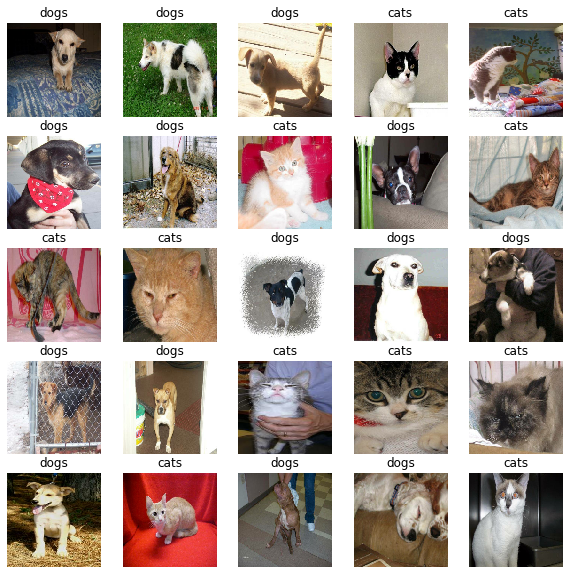

In [0]:
import matplotlib.pyplot as plt

train_ds = prepare_for_training(labeled_train_ds)

image_batch, label_batch = next(iter(train_ds))

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]])
      plt.axis('off')

show_batch(image_batch.numpy(), label_batch.numpy())

In [0]:
model_ds = define_model()

train_ds = prepare_for_training(labeled_train_ds)
test_ds = prepare_for_training(labeled_test_ds)

history = model_ds.fit(train_ds, steps_per_epoch=STEPS_PER_EPOCH, validation_data=test_ds, validation_steps=VAL_STEPS, epochs=30, verbose=1)

Train for 148.0 steps, validate for 49.0 steps
Epoch 1/30
148/148 [==============================] - 55s 369ms/step - loss: 0.6360 - accuracy: 0.6774 - val_loss: 2.5844 - val_accuracy: 0.5013
Epoch 2/30
148/148 [==============================] - 45s 303ms/step - loss: 0.4944 - accuracy: 0.7624 - val_loss: 1.1649 - val_accuracy: 0.5006
Epoch 3/30
148/148 [==============================] - 45s 303ms/step - loss: 0.4106 - accuracy: 0.8117 - val_loss: 0.5651 - val_accuracy: 0.7093
Epoch 4/30
148/148 [==============================] - 45s 303ms/step - loss: 0.3882 - accuracy: 0.8230 - val_loss: 0.4667 - val_accuracy: 0.7832
Epoch 5/30
148/148 [==============================] - 45s 303ms/step - loss: 0.2949 - accuracy: 0.8733 - val_loss: 0.4933 - val_accuracy: 0.7808
Epoch 6/30
148/148 [==============================] - 45s 303ms/step - loss: 0.2307 - accuracy: 0.9057 - val_loss: 0.3652 - val_accuracy: 0.8476
Epoch 7/30
148/148 [==============================] - 45s 303ms/step - loss: 0.1903

loss:  0.428, accuracy: 89.429%


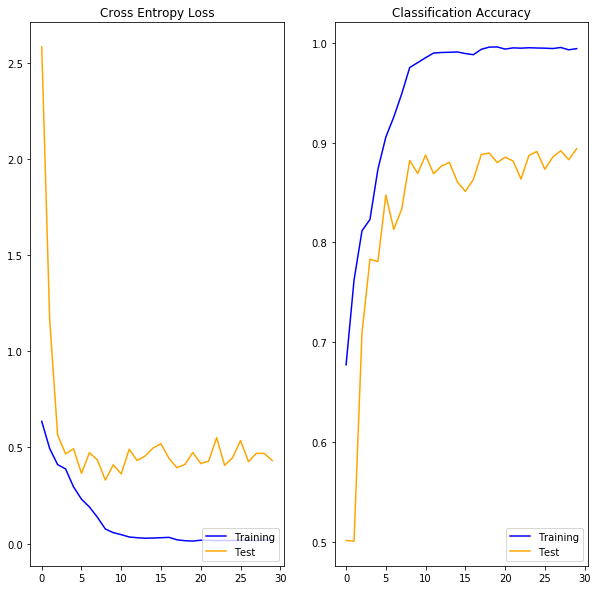

In [0]:
loss, acc = model_ds.evaluate(test_ds, steps=VAL_STEPS, verbose=0)
print("loss: {:6.3f}, accuracy: {:6.3f}%".format(loss, acc*100))
summarize_diagnostics(history)

In [0]:
model_ds.save('scratch_model.h5')

Transfer learning

In [0]:
# Create the base model from the pre-trained model MobileNet V2
import tensorflow as tf

base_model = tf.keras.applications.MobileNetV2(input_shape=(200,200,3), include_top=False, weights='imagenet')

image_batch, label_batch = next(iter(train_ds))

feature_batch = base_model(image_batch)
print(feature_batch.shape)

base_model.trainable = False

base_model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


(128, 7, 7, 1280)
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 201, 201, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 100, 100, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 100, 100, 32) 128         Conv1[0][0]                      
_____________________________________________________________

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model_trans = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

(128, 1280)
(128, 1)


In [0]:
model_trans.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model_trans.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


Evaluate the untrained model

In [0]:
loss0, acc0 = model_trans.evaluate(test_ds, steps=VAL_STEPS, verbose=0)
print("loss: {:6.3f}, accuracy: {:6.3f}%".format(loss0, acc0*100))

loss:  0.639, accuracy: 60.061%


Tran the transfered model

In [0]:
history = model_trans.fit(train_ds, steps_per_epoch=STEPS_PER_EPOCH, validation_data=test_ds, validation_steps=VAL_STEPS, epochs=30, verbose=1)


Train for 148.0 steps, validate for 49.0 steps
Epoch 1/30
148/148 [==============================] - 19s 129ms/step - loss: 0.2100 - accuracy: 0.9062 - val_loss: 0.1334 - val_accuracy: 0.9335
Epoch 2/30
148/148 [==============================] - 17s 116ms/step - loss: 0.1115 - accuracy: 0.9550 - val_loss: 0.1416 - val_accuracy: 0.9348
Epoch 3/30
148/148 [==============================] - 17s 116ms/step - loss: 0.0965 - accuracy: 0.9607 - val_loss: 0.1490 - val_accuracy: 0.9356
Epoch 4/30
148/148 [==============================] - 17s 117ms/step - loss: 0.0896 - accuracy: 0.9623 - val_loss: 0.1751 - val_accuracy: 0.9268
Epoch 5/30
148/148 [==============================] - 17s 117ms/step - loss: 0.0863 - accuracy: 0.9637 - val_loss: 0.1316 - val_accuracy: 0.9453
Epoch 6/30
148/148 [==============================] - 17s 117ms/step - loss: 0.0801 - accuracy: 0.9676 - val_loss: 0.1653 - val_accuracy: 0.9338
Epoch 7/30
148/148 [==============================] - 17s 117ms/step - loss: 0.0792

loss:  0.193, accuracy: 93.750%


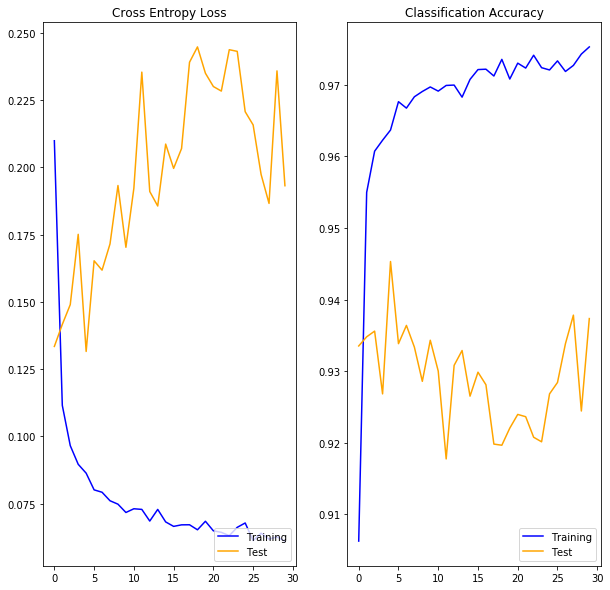

In [0]:
loss, acc = model_trans.evaluate(test_ds, steps=VAL_STEPS, verbose=0)
print("loss: {:6.3f}, accuracy: {:6.3f}%".format(loss, acc*100))
summarize_diagnostics(history)
model_trans.save('transfer_model.h5')

Predict a single image

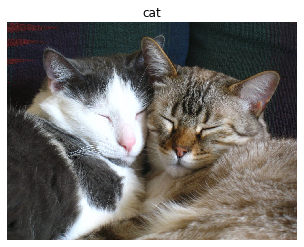

In [0]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


def load_single_image(filename):
  img = load_img(filename, target_size=(200, 200))
  img = img_to_array(img).reshape(1,200,200,3).astype('float32')
  return img/255.0


def predict_single_image(filename):
  CLASS_NAME = np.array(['cat', 'dog'])
  img = load_single_image(filename)
  model = load_model('transfer_model.h5')
  result = model.predict_classes(img)
  label = CLASS_NAME[result[0]]
  return label[0]

file = './cats.jpg'
label = predict_single_image(file)
img = load_img('cats.jpg')
img = img_to_array(img).astype('uint8')
plt.imshow(img)
plt.title(label)
plt.axis('off')
plt.show()

Predict image batch

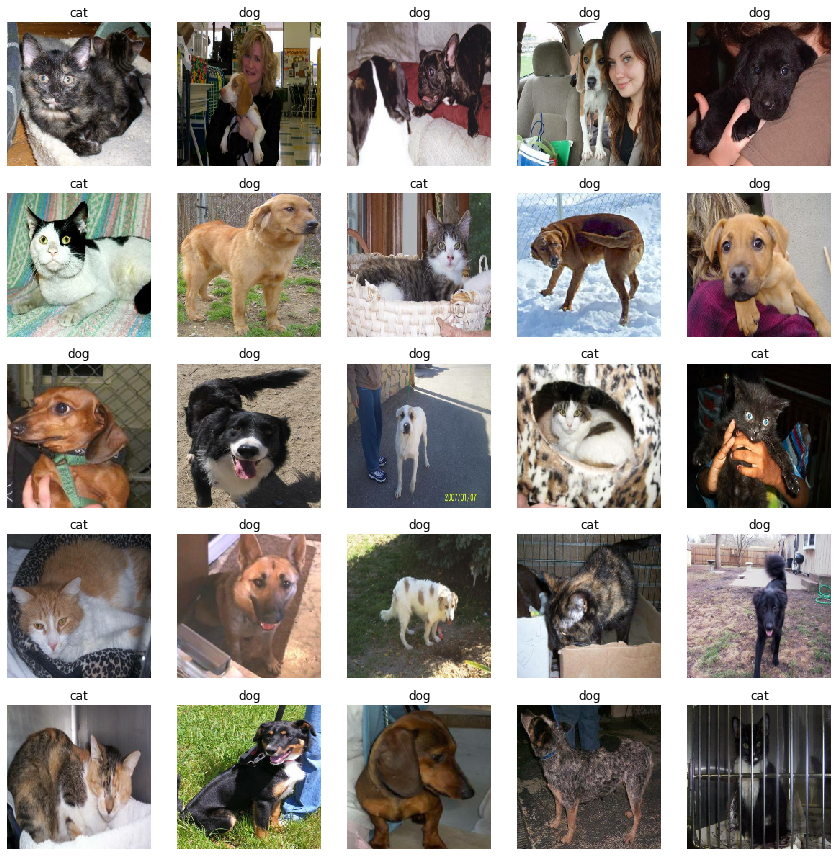

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

test_ds = prepare_for_training(labeled_test_ds)
image_batch, label_batch = next(iter(test_ds))

CLASS_NAME = np.array(['cat', 'dog'])
imgs = image_batch[:25]
#imgXs = tf.cast(imgs, tf.float32)
#imgXs = imgXs / 255.0
model = load_model('transfer_model.h5')
results = model.predict_classes(imgs)

plt.figure(figsize=(12, 12))
for i, image in enumerate(image_batch[:25]):
  plt.subplot(5, 5, i+1)
  plt.imshow(image)
  plt.title(CLASS_NAME[results[i][0]])
  plt.axis('off')

plt.tight_layout()
plt.show()


In [0]:
model = define_model()
datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_it = datagen.flow_from_directory('./dogs_vs_cats/train/', batch_size=128, class_mode='binary' ,target_size=(200,200))
testgen = ImageDataGenerator(rescale=1.0/255.0)
test_it = testgen.flow_from_directory('./dogs_vs_cats/test/', batch_size=128, class_mode='binary' ,target_size=(200,200))

history = model.fit(train_it, validation_data=test_it, epochs=20, verbose=1)
loss, acc = model.evaluate(test_it, verbose=0)
print("loss: {:6.3f}, accuracy: {:6.3f}%".format(loss, acc*100))

Found 18834 images belonging to 2 classes.
Found 6166 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 148 steps, validate for 49 steps
Epoch 1/20
148/148 [==============================] - 215s 1s/step - loss: 0.7774 - accuracy: 0.5496 - val_loss: 0.6374 - val_accuracy: 0.6580
Epoch 2/20
148/148 [==============================] - 204s 1s/step - loss: 0.6139 - accuracy: 0.6736 - val_loss: 0.5811 - val_accuracy: 0.6969
Epoch 3/20
148/148 [==============================] - 197s 1s/step - loss: 0.5778 - accuracy: 0.6984 - val_loss: 0.5461 - val_accuracy: 0.7042
Epoch 4/20
148/148 [==============================] - 197s 1s/step - loss: 0.5334 - accuracy: 0.7339 - val_loss: 0.4955 - val_accuracy: 0.7559
Epoch 5/20
148/148 [==============================] - 199s 1s/step - loss: 0.5014 - accuracy: 0.7536 - val_loss: 0.4686 - val_accuracy: 0.7725
Epoch 6/20
148/148 [==============================] - 202s 1s/step - loss: 0.4766 - accuracy: 0.7750 - val_